In [1]:
import numpy as np 
import pandas as pd

In [2]:
import os
for dirname, _, filenames in os.walk('Restaurant reviews.csv/Restaurant reviews.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df=pd.read_csv("Restaurant reviews.csv/Restaurant reviews.csv")
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,2447.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,NaN
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,NaN
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,NaN
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,NaN


In [4]:
df = df.drop(["Restaurant", "Reviewer", "Metadata", "Pictures" ,"7514"], axis=1)

In [5]:
df["Time"] = list(map(lambda data: str(data).split()[0], df["Time"]))
df["Time"] = list(map(lambda data: str(data).split("/")[-1], df["Time"]))


In [6]:
df['Rating'] = np.where(df["Rating"] == "Like", df['Rating'].value_counts().idxmax(), df['Rating'])


In [7]:
df["Rating"] = list(map(lambda data: float(data) >= 3, df["Rating"]))


In [8]:
df['Time'] = np.where(df["Time"] == "nan", df['Time'].value_counts().idxmax(), df['Time'])

In [9]:
df.sample(10)

,Review,Rating,Time
4172,The osmania biscuits are to die for so are the...,True,2018
945,I had Dry Fruit Overload ice cream from this o...,True,2019
1510,"I have ordered zinger box meal, the chicken in...",False,2019
4011,This is one of the poor Italian restaurants in...,False,2019
5371,Nice juicy chicken tangri\nTasty pizza and mus...,True,2018
4352,Delivery review\nWhat I ordered - best of both...,True,2018
3145,Tried zafrani chicken biryani... Ordered it fo...,True,2018
3593,Not plenty of gravy... Lack of test,True,2018
3026,"Really loved the ambience, great music and of ...",True,2019
6944,Went with our friends for a casual lunch on Fr...,False,2019


In [10]:
from sklearn.preprocessing import MinMaxScaler
mmsTime = MinMaxScaler()

mmsTime.fit(df[["Time"]])
df["Time"] = mmsTime.transform(df[["Time"]])

In [11]:
df["Review"] = df["Review"].fillna("Nothing")
df['Rating'] = df['Rating'].astype(int)
df.rename(columns={'Rating': 'target'}, inplace=True)

In [12]:
df.head()

,Review,target,Time
0,"The ambience was good, food was quite good . h...",1,1.0
1,Ambience is too good for a pleasant evening. S...,1,1.0
2,A must try.. great food great ambience. Thnx f...,1,1.0
3,Soumen das and Arun was a great guy. Only beca...,1,1.0
4,Food is good.we ordered Kodi drumsticks and ba...,1,1.0


In [13]:
def create_corpus_df(review, target):
    corpus=[]
    
    for x in review[review['target']==target]['Review'].str.split():
        for i in x:
            corpus.append(i)
    return corpus


In [14]:
from collections import defaultdict

restaurant_reviews = create_corpus_df(df, 1)

dic=defaultdict(int)
for word in restaurant_reviews:
    dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
top

[('the', 13793),
 ('and', 13692),
 ('was', 7518),
 ('is', 7353),
 ('a', 7342),
 ('to', 7085),
 ('of', 5689),
 ('for', 4868),
 ('with', 4499),
 ('I', 4370)]

In [15]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub(
        'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', 
        '', 
        text
    )
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text

In [16]:
import nltk
from nltk.corpus import stopwords

# Download the stopwords from NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

stemmer = nltk.SnowballStemmer("english")

def preprocess_data(text):
    # Clean puntuation, urls, and so on
    text = clean_text(text)
    # Remove stopwords and Stemm all the words in the sentence
    text = ' '.join(stemmer.stem(word) for word in text.split(' ') if word not in stop_words)

    return text

In [18]:
import  re
import string 

df['Review'] = df['Review'].apply(preprocess_data)
df.head()

,Review,target,Time
0,ambienc good food quit good saturday lunch c...,1,1.0
1,ambienc good pleasant even servic prompt food ...,1,1.0
2,must tri great food great ambienc thnx servic ...,1,1.0
3,soumen das arun great guy behavior sincereti g...,1,1.0
4,food goodw order kodi drumstick basket mutton ...,1,1.0


In [19]:
from collections import defaultdict

restaurant_reviews = create_corpus_df(df, 1)

dic=defaultdict(int)
for word in restaurant_reviews:
    dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
top

[('good', 5807),
 ('place', 4944),
 ('food', 4431),
 ('chicken', 2254),
 ('tast', 2159),
 ('servic', 2033),
 ('order', 2011),
 ('tri', 1741),
 ('great', 1688),
 ('visit', 1565)]

In [20]:
# how to define X and y (from the SMS data) for use with COUNTVECTORIZER
x = df['Review']
y = df['target']

    # Split into train and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

7500 7500
2500 2500


# XGBoost

C:\Users\USER\anaconda3\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Train: 0.9585333333333333
Test: 0.8924


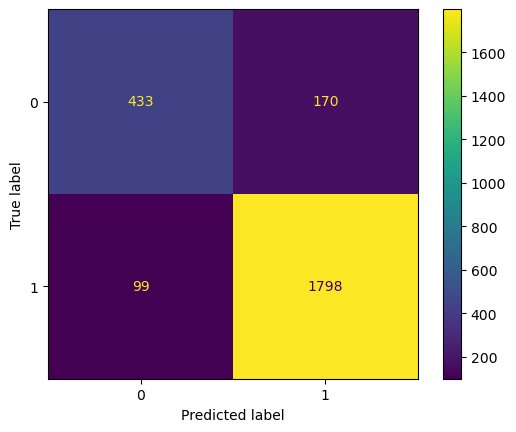

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn import metrics
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


pipe = Pipeline([
    ('bow', CountVectorizer()), 
    ('tfid', TfidfTransformer()),  
    ('model', xgb.XGBClassifier(
        use_label_encoder=False,
        eval_metric='auc',
    ))
])
from sklearn import metrics

# Fit the pipeline with the data
pipe.fit(x_train, y_train)

y_pred_class = pipe.predict(x_test)
y_pred_train = pipe.predict(x_train)

print('Train: {}'.format(metrics.accuracy_score(y_train, y_pred_train)))
print('Test: {}'.format(metrics.accuracy_score(y_test, y_pred_class)))

# Calculate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# LightGBM

[LightGBM] [Info] Number of positive: 5618, number of negative: 1882
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021214 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 42627
[LightGBM] [Info] Number of data points in the train set: 7500, number of used features: 1180
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.749067 -> initscore=1.093641
[LightGBM] [Info] Start training from score 1.093641
Train: 0.9625333333333334
Test: 0.8952


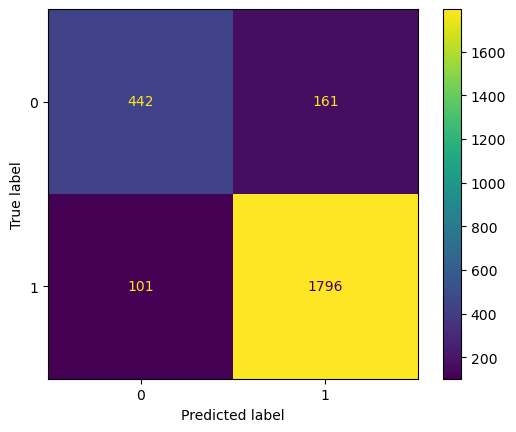

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn import metrics
import lightgbm as lgb  # Importing LightGBM
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define the pipeline using LightGBM classifier
pipe = Pipeline([
    ('bow', CountVectorizer()), 
    ('tfid', TfidfTransformer()),  
    ('model', lgb.LGBMClassifier(
        objective='binary',  # or 'multiclass' for multi-class classification
        metric='auc',
    ))
])

# Fit the pipeline with the data
pipe.fit(x_train, y_train)

y_pred_class = pipe.predict(x_test)
y_pred_train = pipe.predict(x_train)

print('Train: {}'.format(metrics.accuracy_score(y_train, y_pred_train)))
print('Test: {}'.format(metrics.accuracy_score(y_test, y_pred_class)))

# Calculate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# LSTM

In [23]:
train_reviews = df['Review'].values
train_target = df['target'].values

In [25]:
# Calculate the length of our vocabulary
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(train_reviews)

vocab_length = len(word_tokenizer.word_index) + 1
vocab_length

21242

In [26]:
def show_metrics(pred_tag, y_test):
    print("F1-score: ", f1_score(pred_tag, y_test))
    print("Precision: ", precision_score(pred_tag, y_test))
    print("Recall: ", recall_score(pred_tag, y_test))
    print("Accuracy: ", accuracy_score(pred_tag, y_test))
    print("-"*50)
    print(classification_report(pred_tag, y_test))
    
def embed(corpus): 
    return word_tokenizer.texts_to_sequences(corpus)

In [27]:
import nltk
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming you have already downloaded the NLTK tokenizers
nltk.download('punkt')

longest_train = max(train_reviews, key=lambda sentence: len(word_tokenize(sentence)))
length_long_sentence = len(word_tokenize(longest_train))

train_padded_sentences = pad_sequences(
    embed(train_reviews), 
    length_long_sentence, 
    padding='post'
)

train_padded_sentences

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


array([[ 15,   1,   3, ...,   0,   0,   0],
       [ 15,   1, 533, ...,   0,   0,   0],
       [ 34,  10,  12, ...,   0,   0,   0],
       ...,
       [ 47, 124,  57, ...,   0,   0,   0],
       [153,  21, 375, ...,   0,   0,   0],
       [394,  10,  59, ...,   0,   0,   0]])

In [28]:
embedding_dim = 100
embeddings_dictionary = dict()
embedding_matrix = np.zeros((vocab_length, embedding_dim))

for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
        
embedding_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    train_padded_sentences, 
    train_target, 
    test_size=0.25
)

In [30]:
def glove_lstm():
    model = Sequential()
    
    model.add(Embedding(
        input_dim=embedding_matrix.shape[0], 
        output_dim=embedding_matrix.shape[1], 
        weights = [embedding_matrix], 
        input_length=length_long_sentence
    ))
    
    model.add(Bidirectional(LSTM(
        length_long_sentence, 
        return_sequences = True, 
        recurrent_dropout=0.2
    )))
    
    model.add(GlobalMaxPool1D())
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [31]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Bidirectional, GlobalMaxPool1D, BatchNormalization, Dense, Dropout
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [32]:
model = glove_lstm()

checkpoint = ModelCheckpoint(
    'model.h5', 
    monitor = 'val_loss', 
    verbose = 1, 
    save_best_only = True
)
reduce_lr = ReduceLROnPlateau(
    monitor = 'val_loss', 
    factor = 0.2, 
    verbose = 1, 
    patience = 5,                        
    min_lr = 0.001
)
history = model.fit(
    X_train, 
    y_train, 
    epochs = 6,
    batch_size = 32,
    validation_data = (X_test, y_test),
    verbose = 1,
    callbacks = [reduce_lr, checkpoint]
)



Epoch 1/6


235/235 [==============================] - ETA: 0s - loss: 0.6653 - accuracy: 0.7501 
Epoch 1: val_loss improved from inf to 0.64280, saving model to model.h5
235/235 [==============================] - 8495s 36s/step - loss: 0.6653 - accuracy: 0.7501 - val_loss: 0.6428 - val_accuracy: 0.7484 - lr: 0.0010
Epoch 2/6


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


235/235 [==============================] - ETA: 0s - loss: 0.6230 - accuracy: 0.7525 
Epoch 2: val_loss improved from 0.64280 to 0.60776, saving model to model.h5
235/235 [==============================] - 6604s 28s/step - loss: 0.6230 - accuracy: 0.7525 - val_loss: 0.6078 - val_accuracy: 0.7484 - lr: 0.0010
Epoch 3/6
235/235 [==============================] - ETA: 0s - loss: 0.5935 - accuracy: 0.7525 
Epoch 3: val_loss improved from 0.60776 to 0.58524, saving model to model.h5
235/235 [==============================] - 6936s 30s/step - loss: 0.5935 - accuracy: 0.7525 - val_loss: 0.5852 - val_accuracy: 0.7484 - lr: 0.0010
Epoch 4/6
235/235 [==============================] - ETA: 0s - loss: 0.5753 - accuracy: 0.7525 
Epoch 4: val_loss improved from 0.58524 to 0.57272, saving model to model.h5
235/235 [==============================] - 6898s 29s/step - loss: 0.5753 - accuracy: 0.7525 - val_loss: 0.5727 - val_accuracy: 0.7484 - lr: 0.0010
Epoch 5/6
235/235 [==============================]

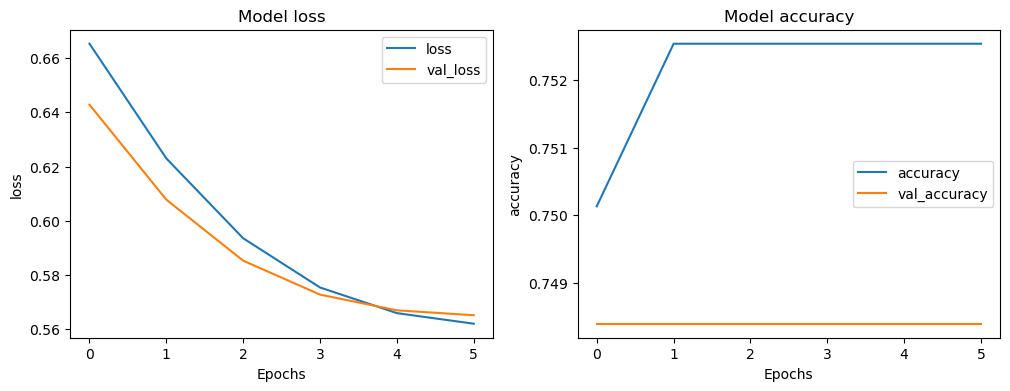

In [ ]:
import matplotlib.pyplot as plt

def plot_learning_curves(history, metrics):
    plt.figure(figsize=(12, 4))

    for i, metric in enumerate(metrics):
        plt.subplot(1, len(metrics), i + 1)
        for m in metric:
            plt.plot(history.history[m], label=m)
        plt.title('Model {}'.format(metric[0]))
        plt.xlabel('Epochs')
        plt.ylabel(metric[0])
        plt.legend()

    plt.show()
    
plot_learning_curves(history, [['loss', 'val_loss'], ['accuracy', 'val_accuracy']])